<a href="https://colab.research.google.com/github/tanyabatra30/YOLO/blob/main/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# upload file to the environment
yolo = cv2.dnn.readNet("./yolov3-tiny (4).weights", "./yolov3-tiny.cfg")

In [ ]:
# create classes
classes = []
with open("./coco.names",'r') as f:
  classes = f.read().splitlines()

In [ ]:
# finding the length of classes
len(classes)

80

In [43]:
# loading image
img=cv2.imread("./cat.jpeg")
# creating a preprocessed image cllled blob of size 302x320
blob = cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0), swapRB=True, crop=False)

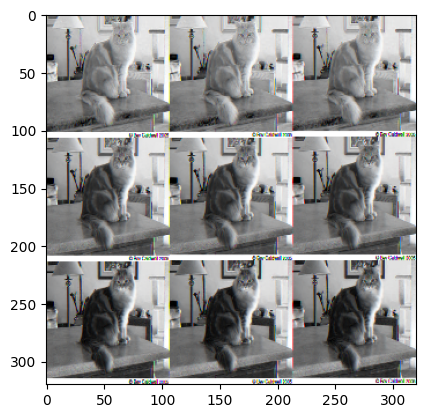

In [ ]:
# printing the image
i=blob[0].reshape(320,320,3)
plt.imshow(i)

In [ ]:
# yolo setup and pushing blob
yolo.setInput(blob)

In [ ]:
output_layes_name = yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layes_name)

In [44]:
# dimensions of the image
width=250
height=200

In [45]:
# capture bounding box list
boxes=[]
confidences = []
class_ids = []
for output in layeroutput:
  for detection in output:
    score=detection[5:]
    class_id=np.argmax(score)
    confidence=score[class_id]
    if confidence>0.7:
      center_x=int(detection[0]*width)
      center_x=int(detection[0]*height)
      w=int(detection[0]*width)
      h=int(detection[0]*height)
      x=int(center_x-w/2)
      y=int(center_y-h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)


In [46]:
len(boxes)

0

In [47]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [48]:
indexes=np.array(indexes)

In [49]:
font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

In [50]:
# displaying the image with labels and confidence level
for i in indexes.flatten():
  x,y,w,h=boxes[i]
  label=str(classes[class_ids[i]])
  confi = str(round(confidences[i],2))
  color=colors[i]

  cv2.rectangle(img,(x,y),(x+w,y+h),color,1)
  cv2.putText(img,label+" "+confi,(x,y+20),font,2,(255,255,255),2)

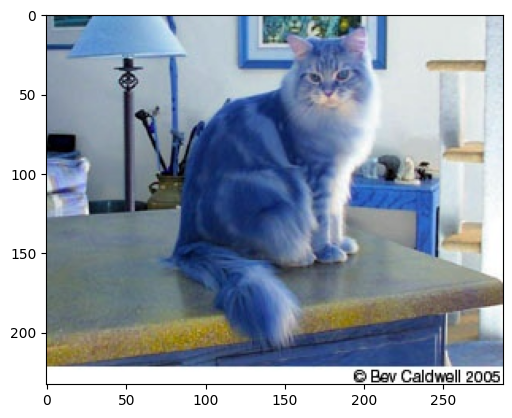

In [51]:
# printing the image
plt.imshow(img)

In [52]:
# save image
cv2.imwrite("./cat.jpeg",img)

True